<a href="https://colab.research.google.com/github/elarchi2005/IA_2025/blob/main/HOUSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_csv('/content/housing.csv')

*Variables*
Longitude=Coordenada de longitud

Latitude= Coordenada de latitud

housing_median_age=edad mediana de las casas en el bloque,calidad vecindario casas nuevas son mas caras

total_rooms=numero total de habitaciones en el bloque X X X necesario households para normalziar

total_bedrooms=numero total de habitaciones dormitorio, tamaño de casas

population=numero de personas que viven en el bloque, si muchas personas
habitan ahi puede bajar el precio?

households=numero de casas, necesario para normalizar total rooms

median_income= valor mediano de las casas en el bloque, el tope maximo es 500001 puede ser un problema

ocean_proximity=distancia al oceano, afecta mucho su valor.


FEATURES CREADAS

rooms_per_household

bedrooms_per_room

population_per_household





In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [11]:
df.duplicated().sum()

np.int64(0)

In [14]:
df.dropna(subset=['total_bedrooms'],inplace=True)

Eliminar esas filas de total budrooms

In [16]:
# df=df[df["median_house_value"]]<500001]

eliminar las casas mayores a 5000001 Porque afectan mucho.

In [17]:
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20433.000000  20433.000000        20433.000000  20433.000000   
mean    -119.570689     35.633221           28.633094   2636.504233   
std        2.003578      2.136348           12.591805   2185.269567   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1450.000000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.720000           37.000000   3143.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20433.000000  20433.000000   20433.000000   
mean       537.870553   1424.946949    499.433465       3.871162   
std        421.385070   1133.208490    382.299226       1.899291   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

Hay escalas muy distintas dentro de el documento, population tiene miles mientras que por ejemplo median_income esta en decenas

In [19]:
corr=df.corr(numeric_only=True)
print(corr["median_house_value"].sort_values(ascending=False))

median_house_value    1.000000
median_income         0.688355
total_rooms           0.133294
housing_median_age    0.106432
households            0.064894
total_bedrooms        0.049686
population           -0.025300
longitude            -0.045398
latitude             -0.144638
Name: median_house_value, dtype: float64


Se puede observar que variables estan relacionadas con el precio directamente
median_income=mas importante, entre mas suba los ingresos de una zona, mas suben los precios(esta directamente correlacionado)
bedrooms_per_room=el hacinamiento baja el valor
latitude=las casas son mas baratas -

In [20]:
print(df["ocean_proximity"].value_counts)

<bound method IndexOpsMixin.value_counts of 0        NEAR BAY
1        NEAR BAY
2        NEAR BAY
3        NEAR BAY
4        NEAR BAY
           ...   
20635      INLAND
20636      INLAND
20637      INLAND
20638      INLAND
20639      INLAND
Name: ocean_proximity, Length: 20433, dtype: object>


In [22]:
print(df.groupby("ocean_proximity")["median_house_value"].mean())

ocean_proximity
<1H OCEAN     240267.990812
INLAND        124896.863147
ISLAND        380440.000000
NEAR BAY      259279.292070
NEAR OCEAN    249042.355023
Name: median_house_value, dtype: float64


Dependiendo de la cercania al oceano las casas valen msa o menos

In [26]:
print(df["median_house_value"].value_counts().sort_index().tail(10))

median_house_value
497400.0      1
497600.0      1
498400.0      1
498600.0      1
498700.0      1
498800.0      1
499000.0      1
499100.0      1
500000.0     27
500001.0    958
Name: count, dtype: int64


aca podemos ver la cantidad de resultados censurados, osea un total de 958

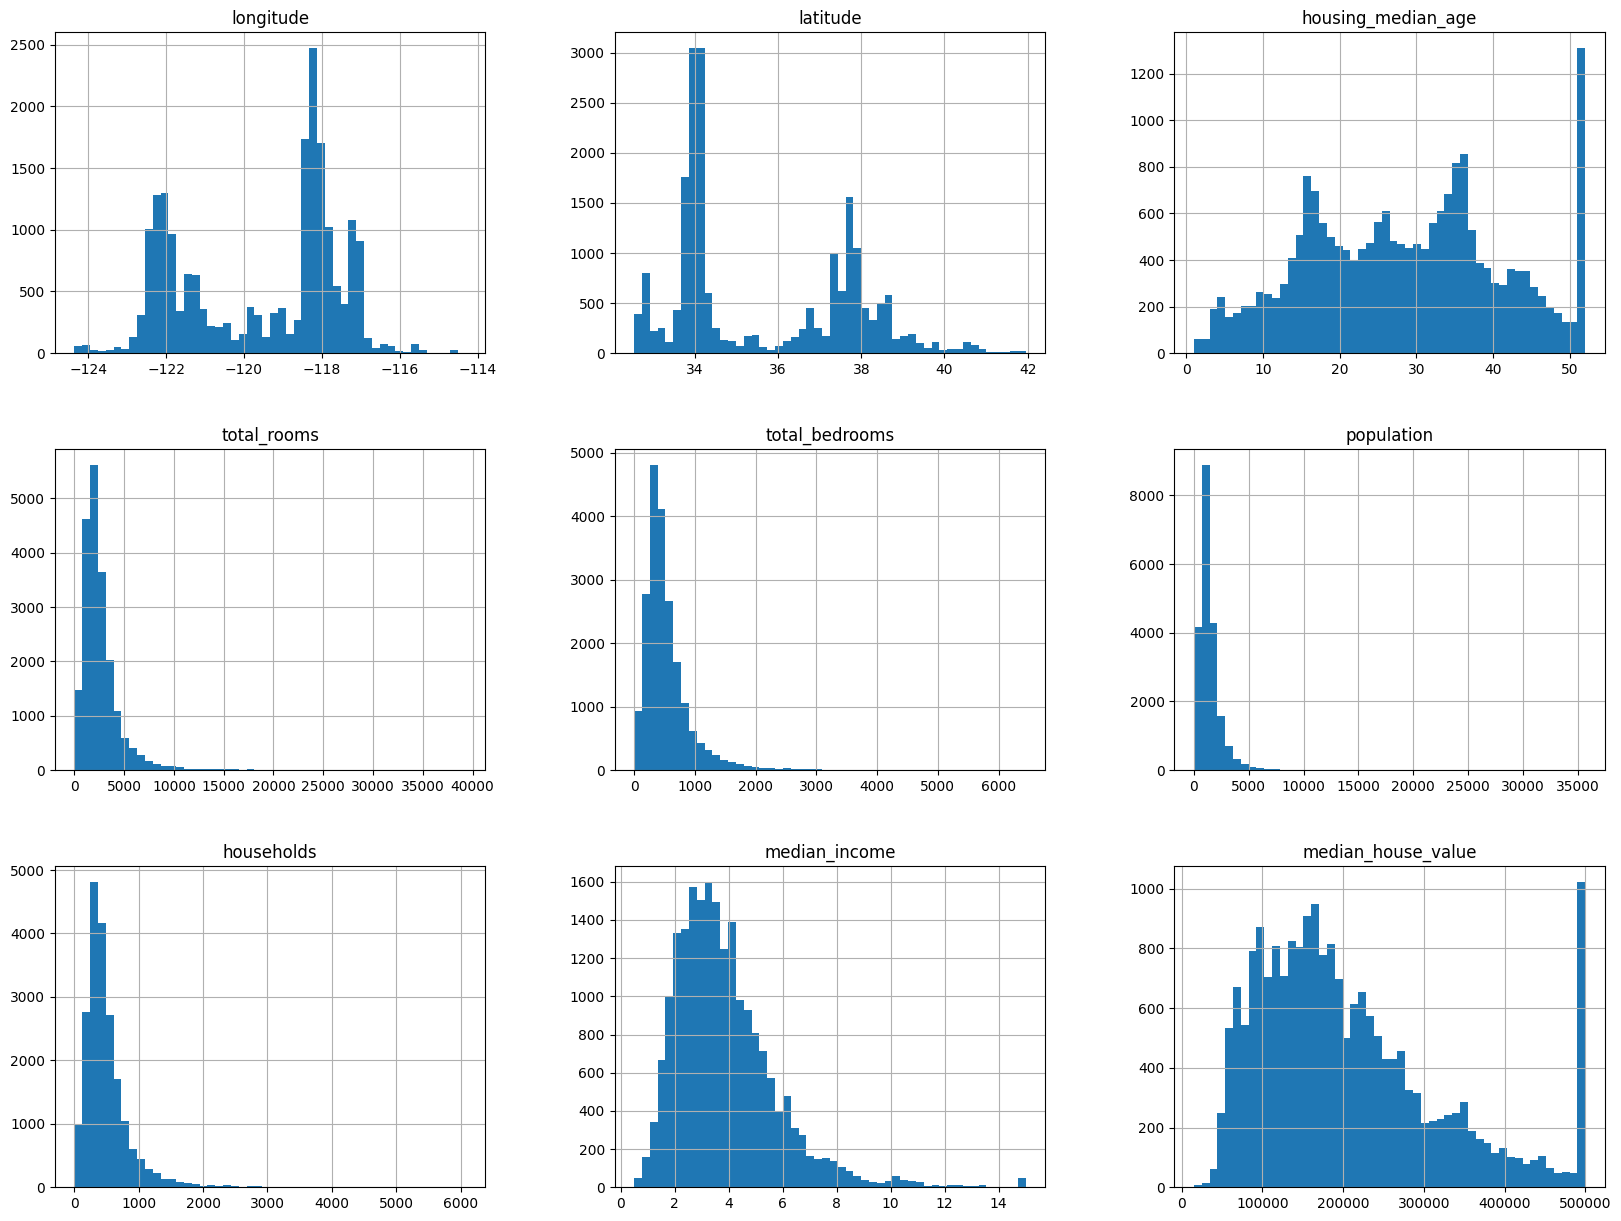

In [27]:
df.hist(bins=50,figsize=(20,15))
plt.show()

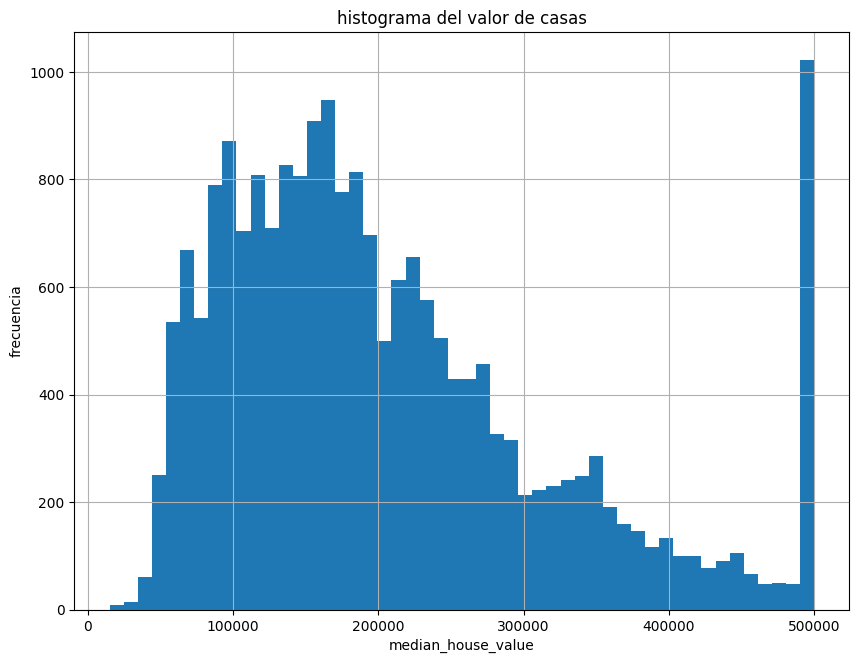

In [31]:
df["median_house_value"].hist(bins=50, figsize=(10,7.5))
plt.xlabel("median_house_value")
plt.ylabel("frecuencia")
plt.title("histograma del valor de casas")
plt.show()

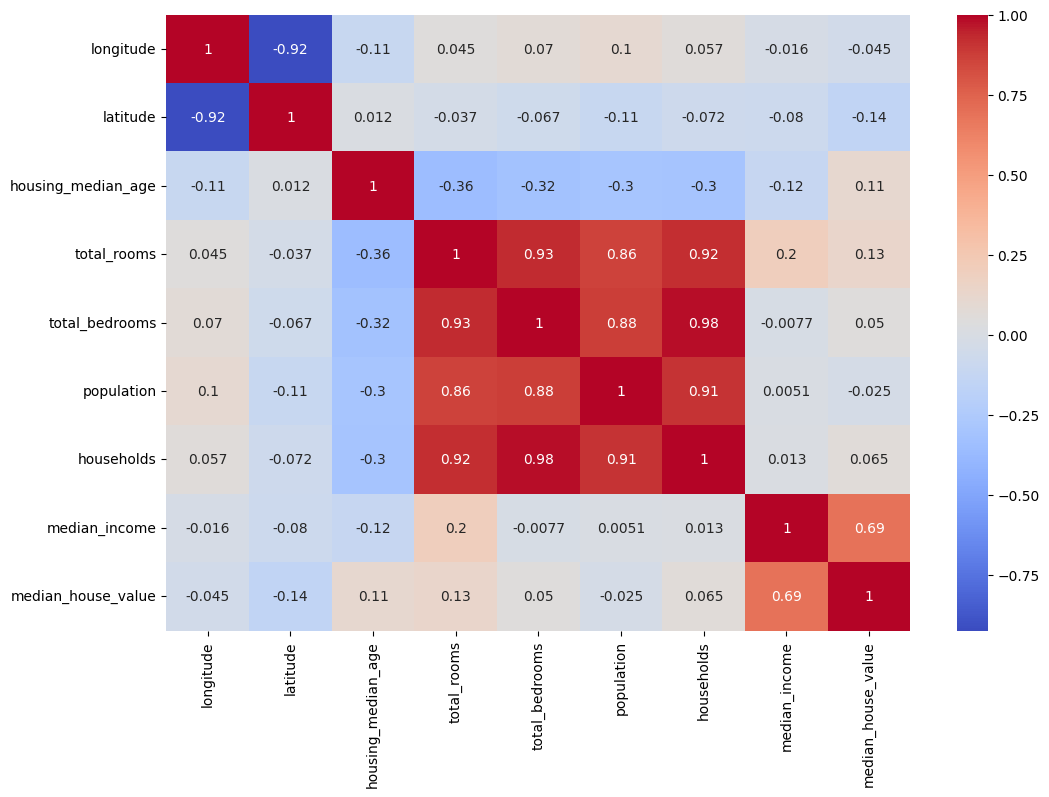

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=(True)),annot=True,cmap="coolwarm")
plt.show("Matriz de correlaciones")
plt.show()

Corte en 500001 debido a censura

> Agregar bloque entrecomillado



Aqui se puede ver claramente la que la median income es la mas relacionada con el precio de las viviendas.

In [41]:
df_encoded=pd.get_dummies(df,columns=["ocean_proximity"])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


In [43]:
df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [48]:
X = df_encoded.drop("median_house_value", axis=1)
y = df_encoded["median_house_value"]

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
print("RMSE:",rmse)
print("regresion todas als features")
print("R2", r2)
print("RMSE",rmse)

RMSE: 68635.10693083826
regresion todas als features
R2 0.6464638320299037
RMSE 68635.10693083826


In [49]:
casa= X.mean().to_frame().T
casa["total_rooms"]=4

In [50]:
precio=lin_reg.predict(casa)[0]
print("El precio de la casa es de:",precio)

El precio de la casa es de: 223168.20611776877


CONCLUSIONES
Median_income es la variable mas importante segun los datos dados, y es una correlacion muy fuerte donde, si el ingreso medio de las casas aumenta, tambien lo hara el valor de las casa


las varaibles total_rooms y total_bedrooms no son eficientes para predecir de manera correcta el precio, dependen mucho de la poblaciony  no de cada vivienda


la variable ocean proximity es muy relevante, esto debido a que las casas ceranas al mar tienden a tener un valor mayor a las zonas mas alejadas o INLAND


El modelo tiene un buen ajuste pero no es perfecto, se necesitan mas features y muchos mas factores relevantes para poder predecir de manera correcta el precio de una casa.